In [46]:
#importing important libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [90]:
df = pd.read_csv("Scored_df.csv")

In [92]:
X = df[["Score"]]

### Justifying the 3 tiers with the Elbow method

In [94]:
inertia = []

In [96]:
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

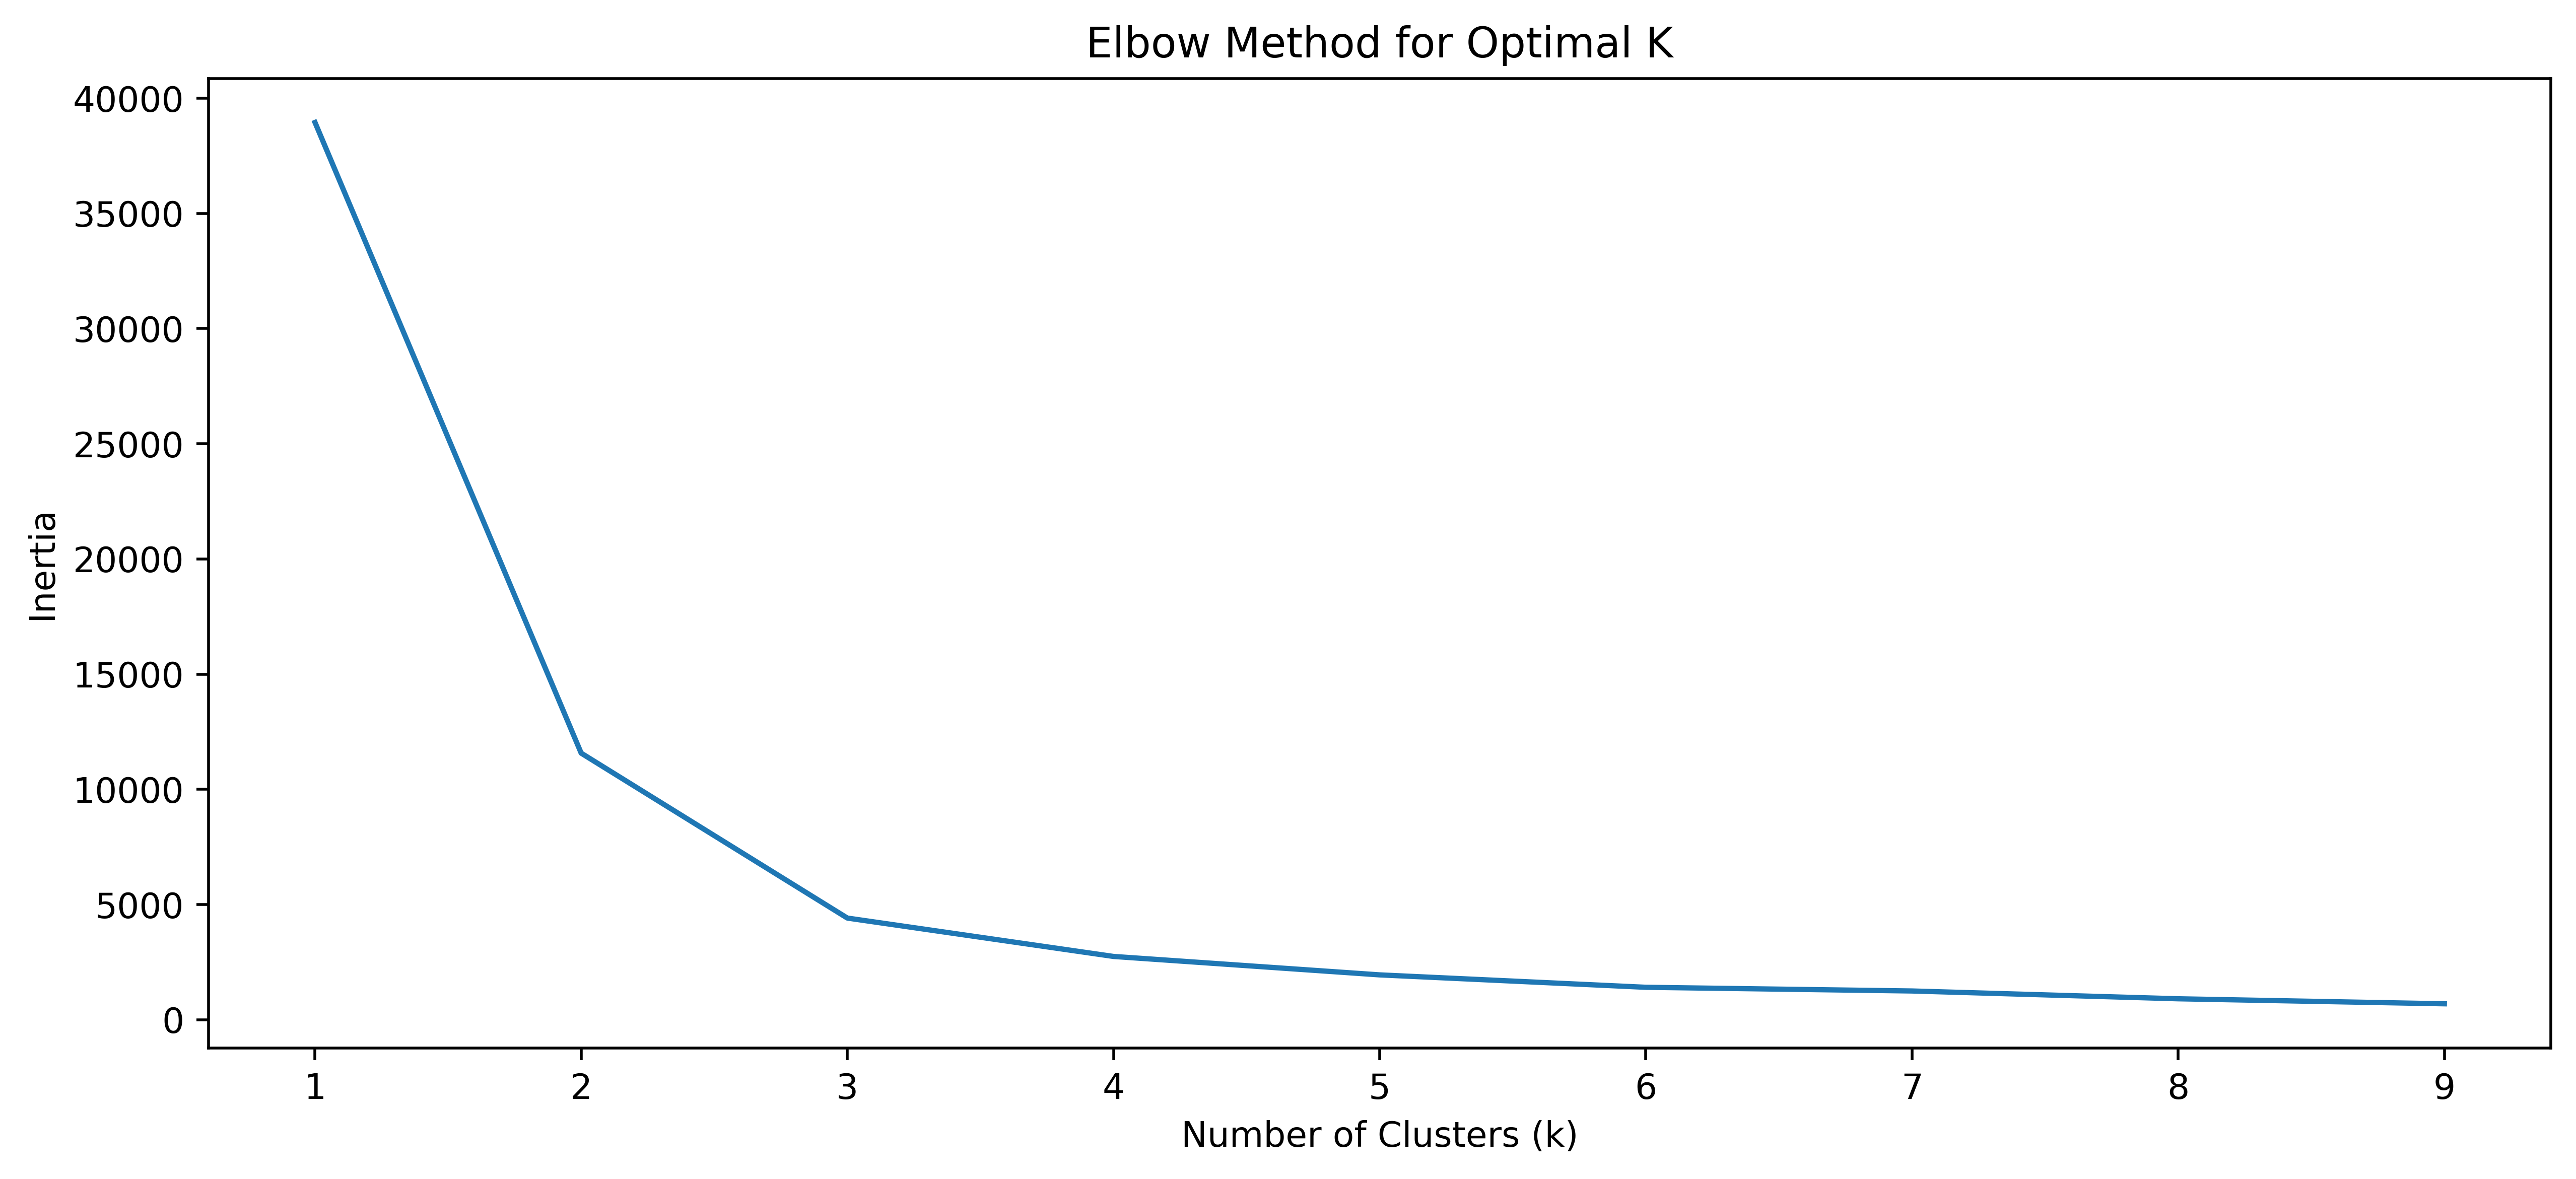

In [98]:
plt.figure(figsize=(12, 5), dpi = 500)
plt.plot(range(1, 10), inertia)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

### Classifying the scores into clusters

In [100]:
kmeans = KMeans(n_clusters= 3)

In [102]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [104]:
clusters = kmeans.predict(X)

In [106]:
df["Clusters"] = clusters

In [114]:
df["Tier"] = df["Clusters"].apply(lambda x: "Eco-Friendly" if x == 1 else "High impact" if x == 0 else "Moderate")

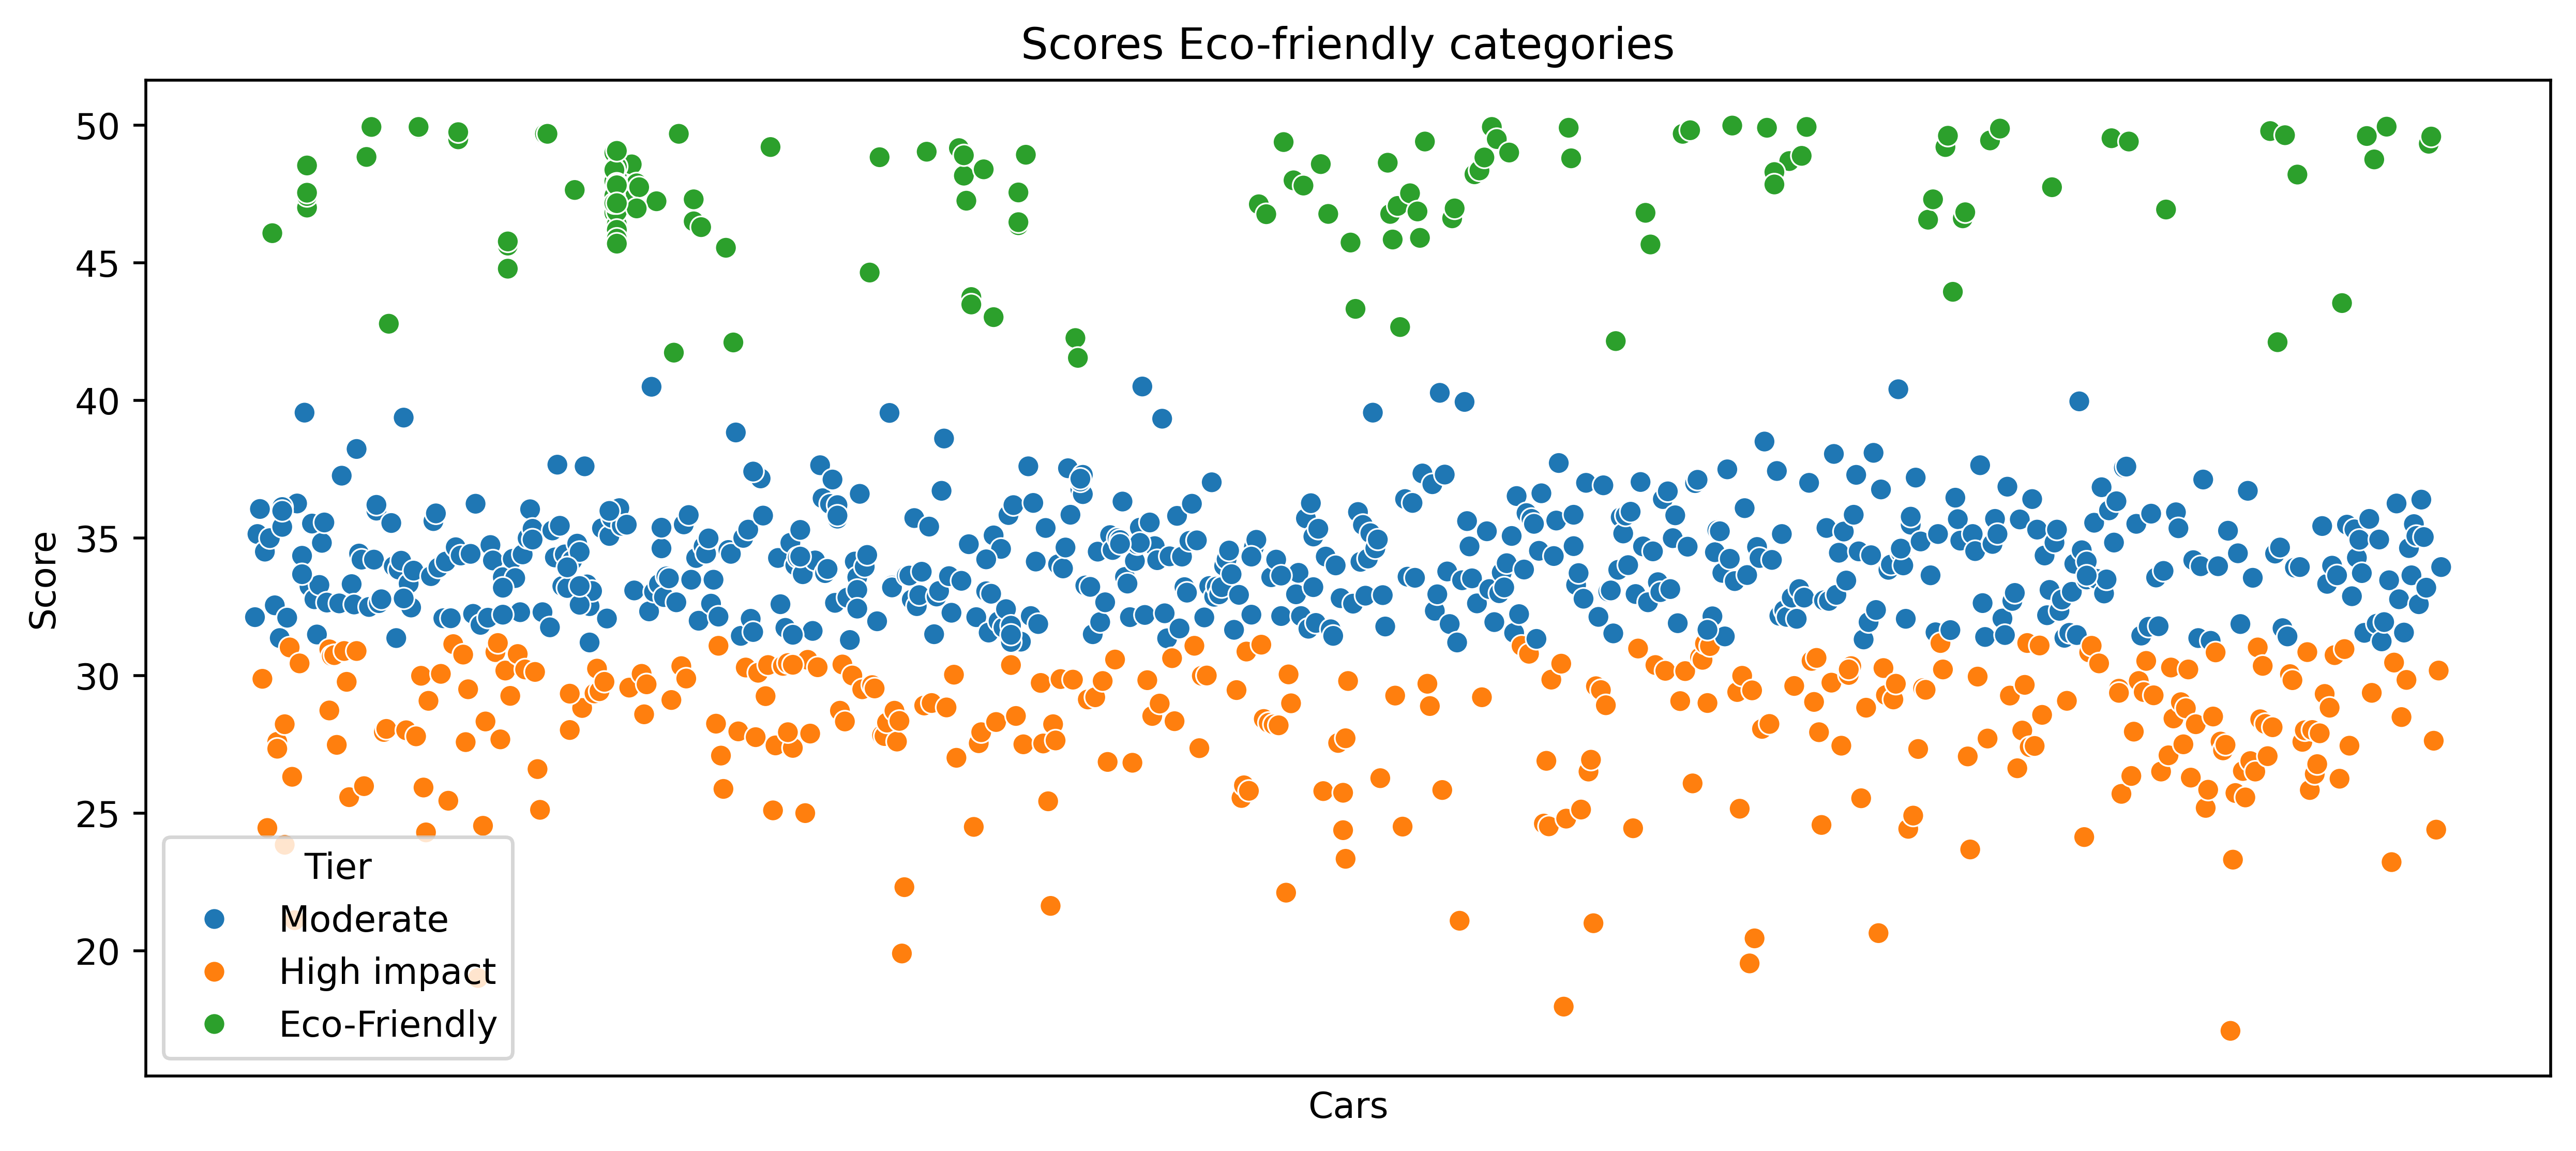

In [116]:
plt.figure(figsize=(12, 5), dpi = 500)
sns.scatterplot(x = "car_name", y = "Score", hue = "Tier", data = df)
plt.xticks([])
plt.xlabel("Cars")
plt.ylabel("Score")
plt.title("Scores Eco-friendly categories")
plt.show()

In [120]:
df.to_csv("Clustered_df.csv")